In [2]:
import numpy as np
import pandas as pd
from lmfit import Model
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import special
import scipy
import math
import scipy.integrate as integrate
import scipy.special as special
from scipy.stats import norm
import matplotlib.mlab as mlab

In [3]:
#names of colums from data
names=['x [mm]','y [mm]','z [mm]','Px [MeV/c]','Py [MeV/c]','Pz[MeV/c]','t [ns]','PDGid [/]','EventID [/]','TrackID [/]','ParentID [/]','Weight[/]']

In [4]:
#reading the data
file = r"C:\Users\Stefan\Documents\Masterarbeit\G4Beamline\BL1U\HARP0.txt"

In [5]:
#Data HARP0
DataFrame = pd.read_csv(file, header=None, sep=' ', comment='#', names=names)
DataFrame_dtype = 'float'
n = 100 #number of events
DataFrame

,x [mm],y [mm],z [mm],Px [MeV/c],Py [MeV/c],Pz[MeV/c],t [ns],PDGid [/],EventID [/],TrackID [/],ParentID [/],Weight[/]
0,-1.186810,-2.179450,0.5,0.492283,-0.248533,1063.02,0.002257,2212,1,1,0,1
1,-0.946667,4.998760,0.5,-0.695401,0.834056,1062.49,0.002258,2212,2,1,0,1
2,0.997678,-2.285410,0.5,0.059215,-0.365499,1063.12,0.002257,2212,3,1,0,1
3,0.383085,0.415370,0.5,-0.521131,0.190759,1063.32,0.002257,2212,4,1,0,1
4,-0.414441,4.303440,0.5,0.359639,0.761852,1064.34,0.002256,2212,5,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,-0.646800,-2.950350,0.5,-0.722994,-0.460107,1062.60,0.002258,2212,99996,1,0,1
99996,-0.613873,0.301542,0.5,-0.409389,0.025507,1062.80,0.002257,2212,99997,1,0,1
99997,-2.264310,5.532300,0.5,0.302349,0.686317,1062.74,0.002257,2212,99998,1,0,1
99998,-0.235550,4.453390,0.5,0.510665,0.567689,1063.89,0.002256,2212,99999,1,0,1


In [6]:
#removes=[]
#Lange= len(DataFrame['y [mm]'])
#for i in range(Lange):
#    if DataFrame['y [mm]'][i] > 250:
#        removes.append(i)

#removes

#DataFrame['y [mm]'].pop(22508)
#DataFrame['x [mm]'].pop(22508)

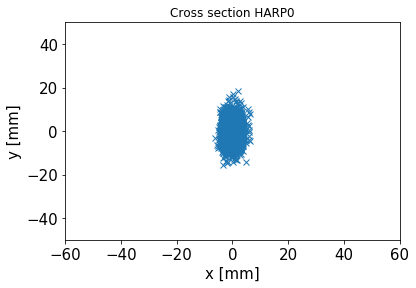

In [7]:
# plot of the cross-section of incidence
plt.figure(1) 
plt.plot(DataFrame['x [mm]'],DataFrame['y [mm]'],'x') 
plt.title('Beam profile HARP0')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(-60, 60)
plt.ylim(-50, 50)
plt.xlabel('x [mm]', fontsize=15)
plt.ylabel('y [mm]', fontsize=15)
plt.savefig("C:\\Users\\Stefan\\Documents\\Masterarbeit\\G4Beamline\\BL1U\\BeamProfiles\\{0}-BeamProfile.png".format(DataFrame['z [mm]'][1]), bbox_inches = "tight")
plt.show()

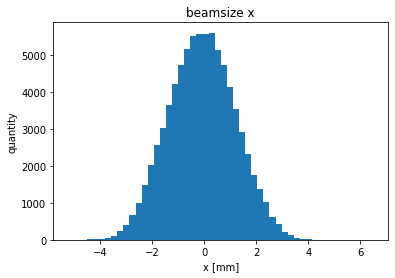

In [7]:
# plot of the beamsize x
plt.figure(2) 
plt.hist(DataFrame['x [mm]'], bins = 50) 
plt.title('beamsize x') 
plt.xlabel('x [mm]') 
plt.ylabel('quantity') 
plt.show()

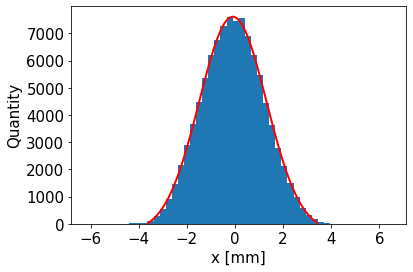

In [20]:
#Fitting of the histogram

#Define Fitting Function 
def FitFunction(x, A, mu, sig, Bkg):
    Gauss = A * np.exp(-(x-mu)**2/(2.*sig*sig)) + Bkg
    return Gauss

#number of points in each bin
numberInBin_x = np.histogram(DataFrame['x [mm]'], bins = 50)
numberInBin2_x = numberInBin_x[0]

#duplicate numbers to become the same amount of values as for the x sizes
numberInBin3_x0 =np.repeat(numberInBin2_x[0], numberInBin2_x[0])
numberInBin3_x0 = numberInBin3_x0.astype('int')
numberInBin3_x1 =np.repeat(numberInBin2_x[1], numberInBin2_x[1])
numberInBin3_x1 = numberInBin3_x1.astype('int')
numberInBin3_x2 =np.repeat(numberInBin2_x[2], numberInBin2_x[2])
numberInBin3_x2 = numberInBin3_x2.astype('int')
numberInBin3_x3 =np.repeat(numberInBin2_x[3], numberInBin2_x[3])
numberInBin3_x3 = numberInBin3_x3.astype('int')
numberInBin3_x4 =np.repeat(numberInBin2_x[4], numberInBin2_x[4])
numberInBin3_x4 = numberInBin3_x4.astype('int')
numberInBin3_x5 =np.repeat(numberInBin2_x[5], numberInBin2_x[5])
numberInBin3_x5 = numberInBin3_x5.astype('int')
numberInBin3_x6 =np.repeat(numberInBin2_x[6], numberInBin2_x[6])
numberInBin3_x6 = numberInBin3_x6.astype('int')
numberInBin3_x7 =np.repeat(numberInBin2_x[7], numberInBin2_x[7])
numberInBin3_x7 = numberInBin3_x7.astype('int')
numberInBin3_x8 =np.repeat(numberInBin2_x[8], numberInBin2_x[8])
numberInBin3_x8 = numberInBin3_x8.astype('int')
numberInBin3_x9 =np.repeat(numberInBin2_x[9], numberInBin2_x[9])
numberInBin3_x9 = numberInBin3_x9.astype('int')
numberInBin3_x10 =np.repeat(numberInBin2_x[10], numberInBin2_x[10])
numberInBin3_x10 = numberInBin3_x10.astype('int')
numberInBin3_x11 =np.repeat(numberInBin2_x[11], numberInBin2_x[11])
numberInBin3_x11 = numberInBin3_x11.astype('int')
numberInBin3_x12 =np.repeat(numberInBin2_x[12], numberInBin2_x[12])
numberInBin3_x12 = numberInBin3_x12.astype('int')
numberInBin3_x13 =np.repeat(numberInBin2_x[13], numberInBin2_x[13])
numberInBin3_x13 = numberInBin3_x13.astype('int')
numberInBin3_x14 =np.repeat(numberInBin2_x[14], numberInBin2_x[14])
numberInBin3_x14 = numberInBin3_x14.astype('int')
numberInBin3_x15 =np.repeat(numberInBin2_x[15], numberInBin2_x[15])
numberInBin3_x15 = numberInBin3_x15.astype('int')
numberInBin3_x16 =np.repeat(numberInBin2_x[16], numberInBin2_x[16])
numberInBin3_x16 = numberInBin3_x16.astype('int')
numberInBin3_x17 =np.repeat(numberInBin2_x[17], numberInBin2_x[17])
numberInBin3_x17 = numberInBin3_x17.astype('int')
numberInBin3_x18 =np.repeat(numberInBin2_x[18], numberInBin2_x[18])
numberInBin3_x18 = numberInBin3_x18.astype('int')
numberInBin3_x19 =np.repeat(numberInBin2_x[19], numberInBin2_x[19])
numberInBin3_x19 = numberInBin3_x19.astype('int')
numberInBin3_x20 =np.repeat(numberInBin2_x[20], numberInBin2_x[20])
numberInBin3_x20 = numberInBin3_x20.astype('int')
numberInBin3_x21 =np.repeat(numberInBin2_x[21], numberInBin2_x[21])
numberInBin3_x21 = numberInBin3_x21.astype('int')
numberInBin3_x22 =np.repeat(numberInBin2_x[22], numberInBin2_x[22])
numberInBin3_x22 = numberInBin3_x22.astype('int')
numberInBin3_x23 =np.repeat(numberInBin2_x[23], numberInBin2_x[23])
numberInBin3_x23 = numberInBin3_x23.astype('int')
numberInBin3_x24 =np.repeat(numberInBin2_x[24], numberInBin2_x[24])
numberInBin3_x24 = numberInBin3_x24.astype('int')
numberInBin3_x25 =np.repeat(numberInBin2_x[25], numberInBin2_x[25])
numberInBin3_x25 = numberInBin3_x25.astype('int')
numberInBin3_x26 =np.repeat(numberInBin2_x[26], numberInBin2_x[26])
numberInBin3_x26 = numberInBin3_x26.astype('int')
numberInBin3_x27 =np.repeat(numberInBin2_x[27], numberInBin2_x[27])
numberInBin3_x27 = numberInBin3_x27.astype('int')
numberInBin3_x28 =np.repeat(numberInBin2_x[28], numberInBin2_x[28])
numberInBin3_x28 = numberInBin3_x28.astype('int')
numberInBin3_x29 =np.repeat(numberInBin2_x[29], numberInBin2_x[29])
numberInBin3_x29 = numberInBin3_x29.astype('int')
numberInBin3_x30 =np.repeat(numberInBin2_x[30], numberInBin2_x[30])
numberInBin3_x30 = numberInBin3_x30.astype('int')
numberInBin3_x31 =np.repeat(numberInBin2_x[31], numberInBin2_x[31])
numberInBin3_x31 = numberInBin3_x31.astype('int')
numberInBin3_x32 =np.repeat(numberInBin2_x[32], numberInBin2_x[32])
numberInBin3_x32 = numberInBin3_x32.astype('int')
numberInBin3_x33 =np.repeat(numberInBin2_x[33], numberInBin2_x[33])
numberInBin3_x33 = numberInBin3_x33.astype('int')
numberInBin3_x34 =np.repeat(numberInBin2_x[34], numberInBin2_x[34])
numberInBin3_x34 = numberInBin3_x34.astype('int')
numberInBin3_x35 =np.repeat(numberInBin2_x[35], numberInBin2_x[35])
numberInBin3_x35 = numberInBin3_x35.astype('int')
numberInBin3_x36 =np.repeat(numberInBin2_x[36], numberInBin2_x[36])
numberInBin3_x36 = numberInBin3_x36.astype('int')
numberInBin3_x37 =np.repeat(numberInBin2_x[37], numberInBin2_x[37])
numberInBin3_x37 = numberInBin3_x37.astype('int')
numberInBin3_x38 =np.repeat(numberInBin2_x[38], numberInBin2_x[38])
numberInBin3_x38 = numberInBin3_x38.astype('int')
numberInBin3_x39 =np.repeat(numberInBin2_x[39], numberInBin2_x[39])
numberInBin3_x39 = numberInBin3_x39.astype('int')
numberInBin3_x40 =np.repeat(numberInBin2_x[40], numberInBin2_x[40])
numberInBin3_x40 = numberInBin3_x40.astype('int')
numberInBin3_x41 =np.repeat(numberInBin2_x[41], numberInBin2_x[41])
numberInBin3_x41 = numberInBin3_x41.astype('int')
numberInBin3_x42 =np.repeat(numberInBin2_x[42], numberInBin2_x[42])
numberInBin3_x42 = numberInBin3_x42.astype('int')
numberInBin3_x43 =np.repeat(numberInBin2_x[43], numberInBin2_x[43])
numberInBin3_x43 = numberInBin3_x43.astype('int')
numberInBin3_x44 =np.repeat(numberInBin2_x[44], numberInBin2_x[44])
numberInBin3_x44 = numberInBin3_x44.astype('int')
numberInBin3_x45 =np.repeat(numberInBin2_x[45], numberInBin2_x[45])
numberInBin3_x45 = numberInBin3_x45.astype('int')
numberInBin3_x46 =np.repeat(numberInBin2_x[46], numberInBin2_x[46])
numberInBin3_x46 = numberInBin3_x46.astype('int')
numberInBin3_x47 =np.repeat(numberInBin2_x[47], numberInBin2_x[47])
numberInBin3_x47 = numberInBin3_x47.astype('int')
numberInBin3_x48 =np.repeat(numberInBin2_x[48], numberInBin2_x[48])
numberInBin3_x48 = numberInBin3_x48.astype('int')
numberInBin3_x49 =np.repeat(numberInBin2_x[49], numberInBin2_x[49])
numberInBin3_x49 = numberInBin3_x49.astype('int')
numberInBin3_x = np.concatenate([numberInBin3_x0, numberInBin3_x1, numberInBin3_x2, numberInBin3_x3, numberInBin3_x4 ,numberInBin3_x5 ,numberInBin3_x6 ,numberInBin3_x7 , numberInBin3_x8 ,numberInBin3_x9,numberInBin3_x10, numberInBin3_x11, numberInBin3_x12, numberInBin3_x13, numberInBin3_x14 ,numberInBin3_x15 ,numberInBin3_x16 ,numberInBin3_x17 , numberInBin3_x18 ,numberInBin3_x19,numberInBin3_x20, numberInBin3_x21, numberInBin3_x22, numberInBin3_x23, numberInBin3_x24 ,numberInBin3_x25 ,numberInBin3_x26 ,numberInBin3_x27 , numberInBin3_x28 ,numberInBin3_x29,numberInBin3_x30, numberInBin3_x31, numberInBin3_x32, numberInBin3_x33, numberInBin3_x34 ,numberInBin3_x35 ,numberInBin3_x36 ,numberInBin3_x37 , numberInBin3_x38 ,numberInBin3_x39,numberInBin3_x40, numberInBin3_x41, numberInBin3_x42, numberInBin3_x43, numberInBin3_x44 ,numberInBin3_x45 ,numberInBin3_x46 ,numberInBin3_x47 , numberInBin3_x48 ,numberInBin3_x49])
numberInBin3_x

#actual fit
priors_x = [1, 0, 2, 1]
popt_x, pcov_x = curve_fit(FitFunction,np.sort(DataFrame['x [mm]']), numberInBin3_x, priors_x, maxfev=10000)

#definition of sigma2_x
sigma_x = popt_x[2]
sigma2_x = sigma_x *2

#define points for a smoth fit line
xspace = np.linspace(np.amin(DataFrame['x [mm]']), np.amax(DataFrame['x [mm]']), 100)

#limitation of the plot area (only where quantitiy>0)
#search for y-transition from negative to positive, to plot only positive curve
posCurve = np.where(FitFunction(xspace, *popt_x)>0)
xspace2 = np.linspace(xspace[posCurve[0][0]], xspace[posCurve[0][len(posCurve[0])-1]], 100)

# plot of the beamsize x
plt.figure(2) 
plt.hist(DataFrame['x [mm]'], bins = 50)  
ax= plt.plot(xspace2,FitFunction(xspace2, *popt_x),'r-', linewidth=2)
#plt.title('Beamsize x') 
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('x [mm]', fontsize=15)
plt.ylabel('Quantity', fontsize=15)
plt.show()

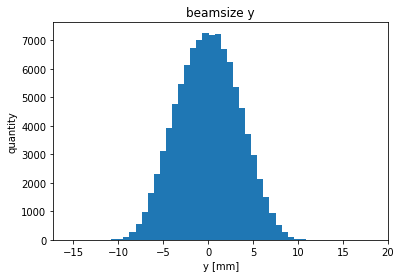

In [17]:
# plot of the beamsize y
plt.figure(3) 
plt.hist(DataFrame['y [mm]'], bins = 50)
plt.title('beamsize y') 
plt.xlabel('y [mm]') 
plt.ylabel('quantity') 
plt.show()

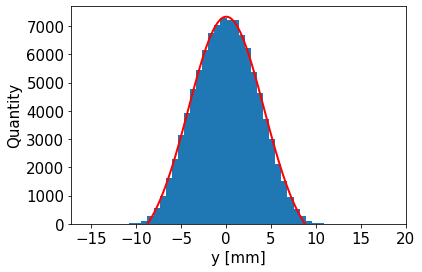

In [21]:
#Fitting of the histogram

#number of points in each bin
numberInBin_y = np.histogram(DataFrame['y [mm]'], bins = 50)
numberInBin2_y = numberInBin_y[0]

#duplicate numbers 10 times to become the same amount of values as for the x sizes
numberInBin3_y0 =np.repeat(numberInBin2_y[0], numberInBin2_y[0])
numberInBin3_y0 = numberInBin3_y0.astype('int')
numberInBin3_y1 =np.repeat(numberInBin2_y[1], numberInBin2_y[1])
numberInBin3_y1 = numberInBin3_y1.astype('int')
numberInBin3_y2 =np.repeat(numberInBin2_y[2], numberInBin2_y[2])
numberInBin3_y2 = numberInBin3_y2.astype('int')
numberInBin3_y3 =np.repeat(numberInBin2_y[3], numberInBin2_y[3])
numberInBin3_y3 = numberInBin3_y3.astype('int')
numberInBin3_y4 =np.repeat(numberInBin2_y[4], numberInBin2_y[4])
numberInBin3_y4 = numberInBin3_y4.astype('int')
numberInBin3_y5 =np.repeat(numberInBin2_y[5], numberInBin2_y[5])
numberInBin3_y5 = numberInBin3_y5.astype('int')
numberInBin3_y6 =np.repeat(numberInBin2_y[6], numberInBin2_y[6])
numberInBin3_y6 = numberInBin3_y6.astype('int')
numberInBin3_y7 =np.repeat(numberInBin2_y[7], numberInBin2_y[7])
numberInBin3_y7 = numberInBin3_y7.astype('int')
numberInBin3_y8 =np.repeat(numberInBin2_y[8], numberInBin2_y[8])
numberInBin3_y8 = numberInBin3_y8.astype('int')
numberInBin3_y9 =np.repeat(numberInBin2_y[9], numberInBin2_y[9])
numberInBin3_y9 = numberInBin3_y9.astype('int')
numberInBin3_y10 =np.repeat(numberInBin2_y[10], numberInBin2_y[10])
numberInBin3_y10 = numberInBin3_y10.astype('int')
numberInBin3_y11 =np.repeat(numberInBin2_y[11], numberInBin2_y[11])
numberInBin3_y11 = numberInBin3_y11.astype('int')
numberInBin3_y12 =np.repeat(numberInBin2_y[12], numberInBin2_y[12])
numberInBin3_y12 = numberInBin3_y12.astype('int')
numberInBin3_y13 =np.repeat(numberInBin2_y[13], numberInBin2_y[13])
numberInBin3_y13 = numberInBin3_y13.astype('int')
numberInBin3_y14 =np.repeat(numberInBin2_y[14], numberInBin2_y[14])
numberInBin3_y14 = numberInBin3_y14.astype('int')
numberInBin3_y15 =np.repeat(numberInBin2_y[15], numberInBin2_y[15])
numberInBin3_y15 = numberInBin3_y15.astype('int')
numberInBin3_y16 =np.repeat(numberInBin2_y[16], numberInBin2_y[16])
numberInBin3_y16 = numberInBin3_y16.astype('int')
numberInBin3_y17 =np.repeat(numberInBin2_y[17], numberInBin2_y[17])
numberInBin3_y17 = numberInBin3_y17.astype('int')
numberInBin3_y18 =np.repeat(numberInBin2_y[18], numberInBin2_y[18])
numberInBin3_y18 = numberInBin3_y18.astype('int')
numberInBin3_y19 =np.repeat(numberInBin2_y[19], numberInBin2_y[19])
numberInBin3_y19 = numberInBin3_y19.astype('int')
numberInBin3_y20 =np.repeat(numberInBin2_y[20], numberInBin2_y[20])
numberInBin3_y20 = numberInBin3_y20.astype('int')
numberInBin3_y21 =np.repeat(numberInBin2_y[21], numberInBin2_y[21])
numberInBin3_y21 = numberInBin3_y21.astype('int')
numberInBin3_y22 =np.repeat(numberInBin2_y[22], numberInBin2_y[22])
numberInBin3_y22 = numberInBin3_y22.astype('int')
numberInBin3_y23 =np.repeat(numberInBin2_y[23], numberInBin2_y[23])
numberInBin3_y23 = numberInBin3_y23.astype('int')
numberInBin3_y24 =np.repeat(numberInBin2_y[24], numberInBin2_y[24])
numberInBin3_y24 = numberInBin3_y24.astype('int')
numberInBin3_y25 =np.repeat(numberInBin2_y[25], numberInBin2_y[25])
numberInBin3_y25 = numberInBin3_y25.astype('int')
numberInBin3_y26 =np.repeat(numberInBin2_y[26], numberInBin2_y[26])
numberInBin3_y26 = numberInBin3_y26.astype('int')
numberInBin3_y27 =np.repeat(numberInBin2_y[27], numberInBin2_y[27])
numberInBin3_y27 = numberInBin3_y27.astype('int')
numberInBin3_y28 =np.repeat(numberInBin2_y[28], numberInBin2_y[28])
numberInBin3_y28 = numberInBin3_y28.astype('int')
numberInBin3_y29 =np.repeat(numberInBin2_y[29], numberInBin2_y[29])
numberInBin3_y29 = numberInBin3_y29.astype('int')
numberInBin3_y30 =np.repeat(numberInBin2_y[30], numberInBin2_y[30])
numberInBin3_y30 = numberInBin3_y30.astype('int')
numberInBin3_y31 =np.repeat(numberInBin2_y[31], numberInBin2_y[31])
numberInBin3_y31 = numberInBin3_y31.astype('int')
numberInBin3_y32 =np.repeat(numberInBin2_y[32], numberInBin2_y[32])
numberInBin3_y32 = numberInBin3_y32.astype('int')
numberInBin3_y33 =np.repeat(numberInBin2_y[33], numberInBin2_y[33])
numberInBin3_y33 = numberInBin3_y33.astype('int')
numberInBin3_y34 =np.repeat(numberInBin2_y[34], numberInBin2_y[34])
numberInBin3_y34 = numberInBin3_y34.astype('int')
numberInBin3_y35 =np.repeat(numberInBin2_y[35], numberInBin2_y[35])
numberInBin3_y35 = numberInBin3_y35.astype('int')
numberInBin3_y36 =np.repeat(numberInBin2_y[36], numberInBin2_y[36])
numberInBin3_y36 = numberInBin3_y36.astype('int')
numberInBin3_y37 =np.repeat(numberInBin2_y[37], numberInBin2_y[37])
numberInBin3_y37 = numberInBin3_y37.astype('int')
numberInBin3_y38 =np.repeat(numberInBin2_y[38], numberInBin2_y[38])
numberInBin3_y38 = numberInBin3_y38.astype('int')
numberInBin3_y39 =np.repeat(numberInBin2_y[39], numberInBin2_y[39])
numberInBin3_y39 = numberInBin3_y39.astype('int')
numberInBin3_y40 =np.repeat(numberInBin2_y[40], numberInBin2_y[40])
numberInBin3_y40 = numberInBin3_y40.astype('int')
numberInBin3_y41 =np.repeat(numberInBin2_y[41], numberInBin2_y[41])
numberInBin3_y41 = numberInBin3_y41.astype('int')
numberInBin3_y42 =np.repeat(numberInBin2_y[42], numberInBin2_y[42])
numberInBin3_y42 = numberInBin3_y42.astype('int')
numberInBin3_y43 =np.repeat(numberInBin2_y[43], numberInBin2_y[43])
numberInBin3_y43 = numberInBin3_y43.astype('int')
numberInBin3_y44 =np.repeat(numberInBin2_y[44], numberInBin2_y[44])
numberInBin3_y44 = numberInBin3_y44.astype('int')
numberInBin3_y45 =np.repeat(numberInBin2_y[45], numberInBin2_y[45])
numberInBin3_y45 = numberInBin3_y45.astype('int')
numberInBin3_y46 =np.repeat(numberInBin2_y[46], numberInBin2_y[46])
numberInBin3_y46 = numberInBin3_y46.astype('int')
numberInBin3_y47 =np.repeat(numberInBin2_y[47], numberInBin2_y[47])
numberInBin3_y47 = numberInBin3_y47.astype('int')
numberInBin3_y48 =np.repeat(numberInBin2_y[48], numberInBin2_y[48])
numberInBin3_y48 = numberInBin3_y48.astype('int')
numberInBin3_y49 =np.repeat(numberInBin2_y[49], numberInBin2_y[49])
numberInBin3_y49 = numberInBin3_y49.astype('int')
numberInBin3_y = np.concatenate([numberInBin3_y0, numberInBin3_y1, numberInBin3_y2, numberInBin3_y3, numberInBin3_y4 ,numberInBin3_y5 ,numberInBin3_y6 ,numberInBin3_y7 , numberInBin3_y8 ,numberInBin3_y9,numberInBin3_y10, numberInBin3_y11, numberInBin3_y12, numberInBin3_y13, numberInBin3_y14 ,numberInBin3_y15 ,numberInBin3_y16 ,numberInBin3_y17 , numberInBin3_y18 ,numberInBin3_y19,numberInBin3_y20, numberInBin3_y21, numberInBin3_y22, numberInBin3_y23, numberInBin3_y24 ,numberInBin3_y25 ,numberInBin3_y26 ,numberInBin3_y27 , numberInBin3_y28 ,numberInBin3_y29,numberInBin3_y30, numberInBin3_y31, numberInBin3_y32, numberInBin3_y33, numberInBin3_y34 ,numberInBin3_y35 ,numberInBin3_y36 ,numberInBin3_y37 , numberInBin3_y38 ,numberInBin3_y39,numberInBin3_y40, numberInBin3_y41, numberInBin3_y42, numberInBin3_y43, numberInBin3_y44 ,numberInBin3_y45 ,numberInBin3_y46 ,numberInBin3_y47 , numberInBin3_y48 ,numberInBin3_y49])
numberInBin3_y

#actual fit
priors_y = [1, 0, 2, 1]
popt_y, pcov_y = curve_fit(FitFunction,np.sort(DataFrame['y [mm]']), numberInBin3_y, priors_y, maxfev=10000)

#definition og sigma2_x
sigma_y = popt_y[2]
sigma2_y = sigma_y *2

#define points for a smoth fit line
yspace = np.linspace(np.amin(DataFrame['y [mm]']), np.amax(DataFrame['y [mm]']), 100)

#limitation of the plot area (only where quantitiy>0)
#search for y-transition from negative to positive, to plot only positive curve
posCurve = np.where(FitFunction(yspace, *popt_y)>0)
yspace2 = np.linspace(yspace[posCurve[0][0]], yspace[posCurve[0][len(posCurve[0])-1]], 100)

# plot of the beamsize x
plt.figure(2) 
plt.hist(DataFrame['y [mm]'], bins = 50)  
plt.plot(yspace2,FitFunction(yspace2, *popt_y),'r-', linewidth=2)
#plt.title('Beamsize y') 
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('y [mm]', fontsize=15)
plt.ylabel('Quantity', fontsize=15)
plt.show()

In [12]:
#Define Fitting Function 
def FitFunction(x, A, mu, sig, Bkg):
    Gauss = A * np.exp(-(x-mu)**2/(2.*sig*sig)) + Bkg
    return Gauss

pcov_y

array([[ 4.68372296e+01,  7.28506355e-06,  1.95016932e-02,
        -4.84815116e+01],
       [ 7.28506355e-06,  4.60929293e-07,  9.06235043e-09,
        -1.03058694e-05],
       [ 1.95016932e-02,  9.06235043e-09,  9.48632732e-06,
        -2.10638301e-02],
       [-4.84815116e+01, -1.03058694e-05, -2.10638301e-02,
         5.10972703e+01]])

In [13]:
values = [DataFrame['z [mm]'][1]]
values.append(sigma2_x)
values.append(sigma2_y)
#values.append(math.sqrt(pcov_x[2][2])*2)
#values.append(math.sqrt(pcov_y[2][2])*2)
values

[0.5,
 -2.7928716511673946,
 8.423667547516548,
 0.0017813011636977332,
 0.006159976401129695]

In [14]:
with open(r"C:\Users\Stefan\Documents\Masterarbeit\G4Beamline\BL1U\Results.txt", "ab") as f:
    f.write(b"\n")
    np.savetxt(f, values, fmt='%1.3f', newline=' ')